In [197]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import nltk
from textblob import TextBlob

In [3]:
full_data = pd.read_csv('aita_clean.csv')

In [4]:
full_data.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
0,arfcfl,1550365421,AITA - Getting Hugged At The Bar,\n\nThis all happened less than an hour ago.\...,False,not the asshole,3,14,0
1,cg8mxn,1563769917,AITA if i don't want to pay my friend 5 dollar...,"So, my friend bought herself, our other friend...",False,asshole,11,42,1
2,bajsje,1554663842,AITA For going to 'expensive' restaurants in s...,It's in Seattle if that matters. It seems peop...,1554686830.0,asshole,657,397,1
3,cq6voc,1565771883,"AITA for wanting ""free gas"", due to an attenda...",I was with my dad and driving the family car w...,1565773989.0,not the asshole,49,40,0
4,bz4m2k,1560207411,AITA I asked my dad to replace the fuel that h...,Am I the asshole for asking my dad to replace ...,False,not the asshole,4,10,0


In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
id              10000 non-null object
timestamp       10000 non-null int64
title           10000 non-null object
body            9993 non-null object
edited          10000 non-null object
verdict         10000 non-null object
score           10000 non-null int64
num_comments    10000 non-null int64
is_asshole      10000 non-null int64
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [6]:
empty_body = full_data[full_data['body'].isnull()]

In [7]:
empty_body

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
525,8m1373,1527248555,"AITA? Whenever I get into a religious debate, ...",NaN,False,asshole,6,24,1
3205,8bdpc6,1523413473,AITA for how I parked?,NaN,False,asshole,357,268,1
5334,93dym6,1533039397,AITA if i laugh when babies fall down and cry?...,NaN,False,not the asshole,12,29,0
5465,5lgkak,1483297705,AITA for thinking it's better to give money to...,NaN,False,not the asshole,20,5,0
7488,5hqo5f,1481471842,AITA for taking this picture and posting it to...,NaN,False,asshole,81,86,1
8012,azlo3l,1552258622,AITA after being offered a cigarette from a cl...,NaN,False,asshole,5,47,1
8451,3d6n5l,1436828279,AITA for being a dick to Amazon customer servi...,NaN,False,asshole,8,26,1


In [8]:
full_data['verdict'].value_counts()

not the asshole     6119
asshole             1988
no assholes here    1288
everyone sucks       605
Name: verdict, dtype: int64

In [9]:
full_data = full_data.dropna()

In [212]:
nta = full_data[full_data['verdict'] == 'not the asshole']
ah = full_data[full_data['verdict'] == 'asshole']

In [213]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 9 columns):
id              9993 non-null object
timestamp       9993 non-null int64
title           9993 non-null object
body            9993 non-null object
edited          9993 non-null object
verdict         9993 non-null object
score           9993 non-null int64
num_comments    9993 non-null int64
is_asshole      9993 non-null int64
dtypes: int64(4), object(5)
memory usage: 780.7+ KB


In [214]:
nta_ds = nta.sample(len(ah)) #downsample to match ah

In [215]:
nta_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 980 to 1687
Data columns (total 9 columns):
id              1983 non-null object
timestamp       1983 non-null int64
title           1983 non-null object
body            1983 non-null object
edited          1983 non-null object
verdict         1983 non-null object
score           1983 non-null int64
num_comments    1983 non-null int64
is_asshole      1983 non-null int64
dtypes: int64(4), object(5)
memory usage: 154.9+ KB


In [216]:
ah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 1 to 9989
Data columns (total 9 columns):
id              1983 non-null object
timestamp       1983 non-null int64
title           1983 non-null object
body            1983 non-null object
edited          1983 non-null object
verdict         1983 non-null object
score           1983 non-null int64
num_comments    1983 non-null int64
is_asshole      1983 non-null int64
dtypes: int64(4), object(5)
memory usage: 154.9+ KB


In [217]:
ah

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
1,cg8mxn,1563769917,AITA if i don't want to pay my friend 5 dollar...,"So, my friend bought herself, our other friend...",False,asshole,11,42,1
2,bajsje,1554663842,AITA For going to 'expensive' restaurants in s...,It's in Seattle if that matters. It seems peop...,1554686830.0,asshole,657,397,1
11,4vlby6,1470036194,AITA for throwing a couple of K-Pop Photocards...,"Ok, so last Saturday, BTS, a K-Pop group had a...",False,asshole,10,2,1
15,as9fwl,1550575964,AITA for making my girlfriend cancel her birth...,Next Saturday is my Birthday and my girlfriend...,False,asshole,17,27,1
17,dbonzb,1569907647,WIBTA if I found a new weight training partner?,I'm on a sports team (at a D1 NCAA school) and...,False,asshole,3,10,1
...,...,...,...,...,...,...,...,...,...
9970,b5xbjr,1553644895,AITA for telling a girl im seeing i didnt like...,Ok so title sounds striaght up but doesnt give...,1553661780.0,asshole,8,31,1
9972,btrhl0,1558991748,WIBTA if I reported my neighbors for overcrowd...,"They fill up the streets with their cars, some...",False,asshole,3,8,1
9973,6eapd8,1496183189,AITA for calling out a friend who says their i...,I have friends who keep referring to their chi...,False,asshole,54,31,1
9981,bweauk,1559587543,AITA For sleeping in my nieces bedroom because...,I was at my sister’s house (Family reasons- pl...,False,asshole,20,43,1


In [228]:
cln_data = pd.concat([ah,nta_ds],0)
cln_data

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
1,cg8mxn,1563769917,AITA if i don't want to pay my friend 5 dollar...,"So, my friend bought herself, our other friend...",False,asshole,11,42,1
2,bajsje,1554663842,AITA For going to 'expensive' restaurants in s...,It's in Seattle if that matters. It seems peop...,1554686830.0,asshole,657,397,1
11,4vlby6,1470036194,AITA for throwing a couple of K-Pop Photocards...,"Ok, so last Saturday, BTS, a K-Pop group had a...",False,asshole,10,2,1
15,as9fwl,1550575964,AITA for making my girlfriend cancel her birth...,Next Saturday is my Birthday and my girlfriend...,False,asshole,17,27,1
17,dbonzb,1569907647,WIBTA if I found a new weight training partner?,I'm on a sports team (at a D1 NCAA school) and...,False,asshole,3,10,1
...,...,...,...,...,...,...,...,...,...
417,bhg1nf,1556238676,AITA for being upset that my girlfriend is ask...,Me (18M) and my girlfriend (18F) have been tog...,False,not the asshole,88,84,0
7883,b72d5f,1553891777,AITA or is my dentist?,"Okay -- so, this is more of a ""am I overreacti...",1554157410.0,not the asshole,17,19,0
3006,bnwio2,1557708648,AITA for not want all of my towns teenagers cu...,I finished building and moved into my new hous...,1557711122.0,not the asshole,3,28,0
8751,awhrxw,1551533405,AITA: I dumped my boyfriend after he took me o...,"So, this happened last year but I have been th...",False,not the asshole,77,38,0


In [229]:
df = pd.DataFrame()
df['tblob'] = cln_data['title'].apply(lambda row: TextBlob(row))
df['pblob'] = cln_data['body'].apply(lambda row: TextBlob(row))
df

,tblob,pblob
1,"(A, I, T, A, , i, f, , i, , d, o, n, ', t, ...","(S, o, ,, , m, y, , f, r, i, e, n, d, , b, ..."
2,"(A, I, T, A, , F, o, r, , g, o, i, n, g, , ...","(I, t, ', s, , i, n, , S, e, a, t, t, l, e, ..."
11,"(A, I, T, A, , f, o, r, , t, h, r, o, w, i, ...","(O, k, ,, , s, o, , l, a, s, t, , S, a, t, ..."
15,"(A, I, T, A, , f, o, r, , m, a, k, i, n, g, ...","(N, e, x, t, , S, a, t, u, r, d, a, y, , i, ..."
17,"(W, I, B, T, A, , i, f, , I, , f, o, u, n, ...","(I, ', m, , o, n, , a, , s, p, o, r, t, s, ..."
...,...,...
417,"(A, I, T, A, , f, o, r, , b, e, i, n, g, , ...","(M, e, , (, 1, 8, M, ), , a, n, d, , m, y, ..."
7883,"(A, I, T, A, , o, r, , i, s, , m, y, , d, ...","(O, k, a, y, , -, -, , s, o, ,, , t, h, i, ..."
3006,"(A, I, T, A, , f, o, r, , n, o, t, , w, a, ...","(I, , f, i, n, i, s, h, e, d, , b, u, i, l, ..."
8751,"(A, I, T, A, :, , I, , d, u, m, p, e, d, , ...","(S, o, ,, , t, h, i, s, , h, a, p, p, e, n, ..."


In [230]:
df['pwords'] = df['pblob'].apply(lambda row: row.words)
df['ptokens'] = df['pblob'].apply(lambda row: row.tokens)
df['pbigram'] = df['pblob'].apply(lambda row: row.ngrams(n=2))
df['ptags'] = df['pblob'].apply(lambda row: row.tags)
df['ppolarity'] = df['pblob'].apply(lambda row: row.sentiment.polarity)
df['pobjectivity'] = df['pblob'].apply(lambda row: row.sentiment.subjectivity)


In [231]:
df['class'] = cln_data['is_asshole']

In [232]:
df['fstword'] = df['pwords'].str[0]

In [233]:
df

,tblob,pblob,pwords,ptokens,pbigram,ptags,ppolarity,pobjectivity,class,fstword
1,"(A, I, T, A, , i, f, , i, , d, o, n, ', t, ...","(S, o, ,, , m, y, , f, r, i, e, n, d, , b, ...","[So, my, friend, bought, herself, our, other, ...","[So, ,, my, friend, bought, herself, ,, our, o...","[[So, my], [my, friend], [friend, bought], [bo...","[(So, RB), (my, PRP$), (friend, NN), (bought, ...",0.105612,0.379082,1,So
2,"(A, I, T, A, , F, o, r, , g, o, i, n, g, , ...","(I, t, ', s, , i, n, , S, e, a, t, t, l, e, ...","[It, 's, in, Seattle, if, that, matters, It, s...","[It, 's, in, Seattle, if, that, matters, ., It...","[[It, 's], ['s, in], [in, Seattle], [Seattle, ...","[(It, PRP), ('s, VBZ), (in, IN), (Seattle, NNP...",0.031250,0.444167,1,It
11,"(A, I, T, A, , f, o, r, , t, h, r, o, w, i, ...","(O, k, ,, , s, o, , l, a, s, t, , S, a, t, ...","[Ok, so, last, Saturday, BTS, a, K-Pop, group,...","[Ok, ,, so, last, Saturday, ,, BTS, ,, a, K-Po...","[[Ok, so], [so, last], [last, Saturday], [Satu...","[(Ok, NNP), (so, IN), (last, JJ), (Saturday, N...",0.022392,0.522109,1,Ok
15,"(A, I, T, A, , f, o, r, , m, a, k, i, n, g, ...","(N, e, x, t, , S, a, t, u, r, d, a, y, , i, ...","[Next, Saturday, is, my, Birthday, and, my, gi...","[Next, Saturday, is, my, Birthday, and, my, gi...","[[Next, Saturday], [Saturday, is], [is, my], [...","[(Next, JJ), (Saturday, NNP), (is, VBZ), (my, ...",-0.112218,0.524624,1,Next
17,"(W, I, B, T, A, , i, f, , I, , f, o, u, n, ...","(I, ', m, , o, n, , a, , s, p, o, r, t, s, ...","[I, 'm, on, a, sports, team, at, a, D1, NCAA, ...","[I, 'm, on, a, sports, team, (, at, a, D1, NCA...","[[I, 'm], ['m, on], [on, a], [a, sports], [spo...","[(I, PRP), ('m, VBP), (on, IN), (a, DT), (spor...",0.133556,0.406694,1,I
...,...,...,...,...,...,...,...,...,...,...
417,"(A, I, T, A, , f, o, r, , b, e, i, n, g, , ...","(M, e, , (, 1, 8, M, ), , a, n, d, , m, y, ...","[Me, 18M, and, my, girlfriend, 18F, have, been...","[Me, (, 18M, ), and, my, girlfriend, (, 18F, )...","[[Me, 18M], [18M, and], [and, my], [my, girlfr...","[(Me, NNP), (18M, CD), (and, CC), (my, PRP$), ...",-0.003437,0.458472,0,Me
7883,"(A, I, T, A, , o, r, , i, s, , m, y, , d, ...","(O, k, a, y, , -, -, , s, o, ,, , t, h, i, ...","[Okay, so, this, is, more, of, a, am, I, overr...","[Okay, --, so, ,, this, is, more, of, a, ``, a...","[[Okay, so], [so, this], [this, is], [is, more...","[(Okay, NNP), (so, RB), (this, DT), (is, VBZ),...",0.031972,0.444244,0,Okay
3006,"(A, I, T, A, , f, o, r, , n, o, t, , w, a, ...","(I, , f, i, n, i, s, h, e, d, , b, u, i, l, ...","[I, finished, building, and, moved, into, my, ...","[I, finished, building, and, moved, into, my, ...","[[I, finished], [finished, building], [buildin...","[(I, PRP), (finished, VBD), (building, NN), (a...",0.063847,0.489202,0,I
8751,"(A, I, T, A, :, , I, , d, u, m, p, e, d, , ...","(S, o, ,, , t, h, i, s, , h, a, p, p, e, n, ...","[So, this, happened, last, year, but, I, have,...","[So, ,, this, happened, last, year, but, I, ha...","[[So, this], [this, happened], [happened, last...","[(So, RB), (this, DT), (happened, VBD), (last,...",0.046307,0.491887,0,So


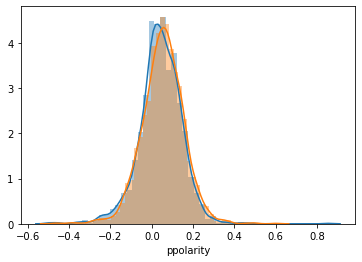

In [234]:
sns.distplot(df[df['class']==0]['ppolarity'])
sns.distplot(df[df['class']==1]['ppolarity'])

In [235]:
df[df['class']==0]['fstword'].value_counts()

I          462
So         289
My         249
This        87
A           37
          ... 
3            1
first        1
Family       1
Without      1
2018         1
Name: fstword, Length: 240, dtype: int64

In [236]:
df[df['class']==1]['fstword'].value_counts()

I            482
My           296
So           262
This          62
Throwaway     50
            ... 
20             1
Sounds         1
Keeping        1
Please         1
Parents        1
Name: fstword, Length: 241, dtype: int64

In [250]:
df[df['fstword']=='Throwaway']['class'].value_counts()

1    50
0    32
Name: class, dtype: int64

In [242]:
df[df['class']==0]['throwaway'].value_counts()

0    1911
1      72
Name: throwaway, dtype: int64

In [243]:
df[df['class']==1]['throwaway'].value_counts()

0    1898
1      85
Name: throwaway, dtype: int64

In [256]:
set([x[1] for x in df['ptags'][1]])

{'CC',
 'CD',
 'DT',
 'IN',
 'JJ',
 'MD',
 'NN',
 'NNP',
 'NNS',
 'PRP',
 'PRP$',
 'RB',
 'TO',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT'}